# Denoising Auto-Encoder

In a DAE the input is corrupted by a corruption $C(\tilde{x}|x)$,  
the DAE must reconstruct the original data correcting noise:

<IPython.core.display.Latex object>

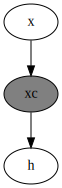

In [60]:
from visualization import graph

base = "xc[style=filled,fillcolor=gray]\n"
graph(
    f"{base}x->xc->h", 
    title="DAE graphical model")


A DAE is forced to learn an __error-correction vector field__ $x-\tilde{x}$:

<img src="images/dae.png" width="500pt"/>

DAEs allow the training of __overcomplete autoencoders__.

Examples of noise used with DAEs are:

- Gaussian noise;
- masking noise;
- salt-and-pepper noise.

In [16]:
# Loading the tools:
%run autoencoders.py

print("Creating the net...")
autoencoder, encoder, decoder = create_net()

Creating the net...


Loading the data...


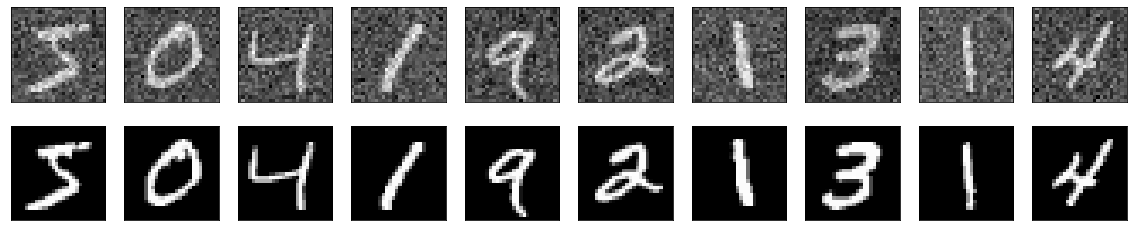

In [17]:
print("Loading the data...")

x_train, y_train, x_test, y_test = load_data(must_corrupt=True)

imshowcompare(x_train, y_train)

In [18]:
from tensorflow.keras.callbacks import TensorBoard

print("Training (phase 1)...")

train(
    net=autoencoder,
    train_data=(x_train, y_train), 
    validation_data=(x_test, y_test),
    callbacks=[TensorBoard(log_dir='generated/DAE')]
)

Training (phase 1)...
Epoch 1/30
938/938 [==============================] - 51s 53ms/step - loss: 0.2605 - val_loss: 0.1445
Epoch 2/30
938/938 [==============================] - 49s 52ms/step - loss: 0.1403 - val_loss: 0.1301
Epoch 3/30
938/938 [==============================] - 49s 52ms/step - loss: 0.1294 - val_loss: 0.1225
Epoch 4/30
938/938 [==============================] - 48s 51ms/step - loss: 0.1226 - val_loss: 0.1183
Epoch 5/30
938/938 [==============================] - 48s 51ms/step - loss: 0.1184 - val_loss: 0.1151
Epoch 6/30
938/938 [==============================] - 50s 53ms/step - loss: 0.1155 - val_loss: 0.1128
Epoch 7/30
938/938 [==============================] - 49s 53ms/step - loss: 0.1131 - val_loss: 0.1112
Epoch 8/30
938/938 [==============================] - 49s 52ms/step - loss: 0.1115 - val_loss: 0.1090
Epoch 9/30
938/938 [==============================] - 51s 54ms/step - loss: 0.1100 - val_loss: 0.1078
Epoch 10/30
938/938 [==============================] - 51s 5

In [19]:
# Saving the models separatedly and together:
autoencoder.save('generated/dae_autoencoder')
encoder.save('generated/dae_encoder')
decoder.save('generated/dae_decoder')

INFO:tensorflow:Assets written to: generated/dae_autoencoder/assets
INFO:tensorflow:Assets written to: generated/dae_encoder/assets
INFO:tensorflow:Assets written to: generated/dae_decoder/assets


In [61]:
from tensorflow.keras.models import load_model

# Loading the models back:
autoencoder = load_model('generated/dae_autoencoder')
encoder = load_model('generated/dae_encoder')
decoder = load_model('generated/dae_decoder')

Using the encoder/decoder pair to denoise...


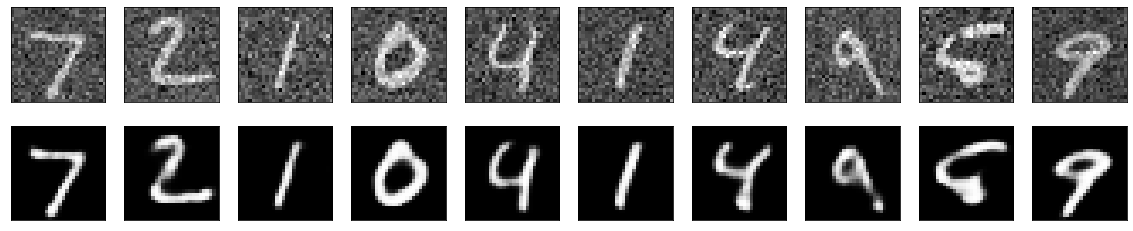

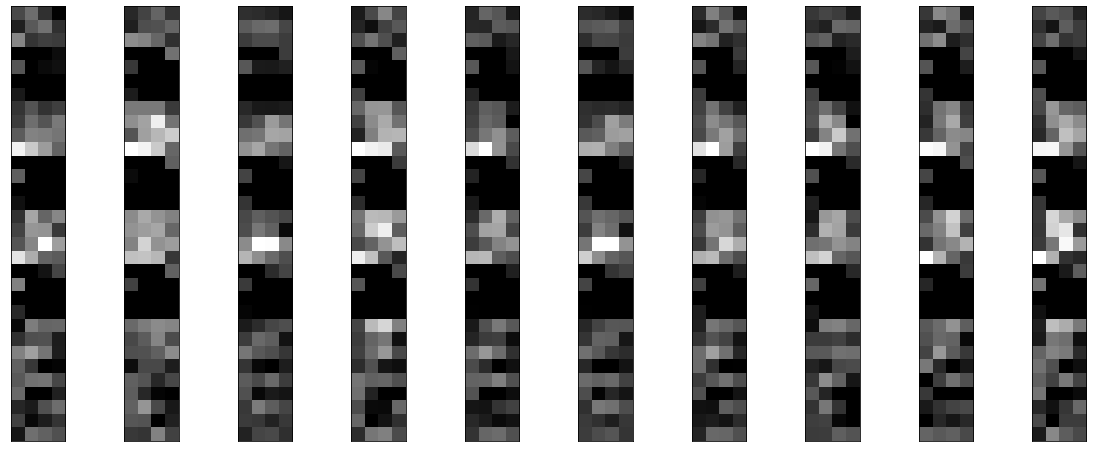

In [21]:
print("Using the encoder/decoder pair to denoise...")

encoded_imgs1 = encoder.predict(x_test)
decoded_imgs1 = decoder.predict(encoded_imgs1)

imshowcompare(x_test, decoded_imgs1)

plotfeatures(encoded_imgs1)

Using the encoder/decoder pair on original images...


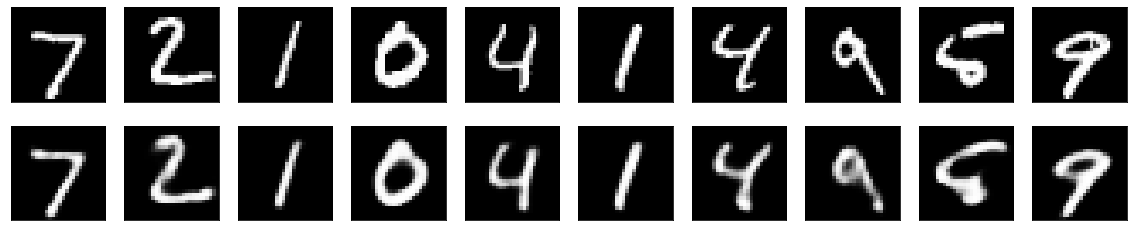

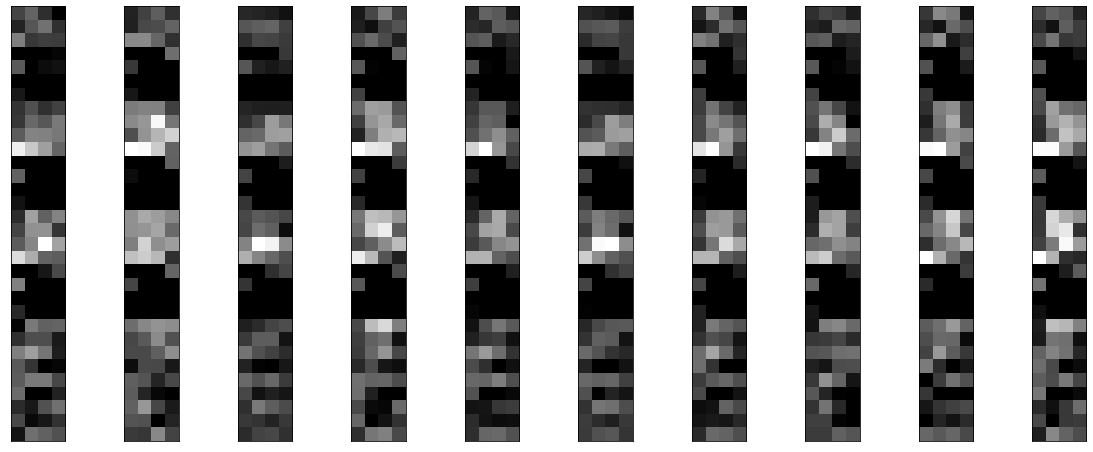

In [22]:
print("Using the encoder/decoder pair on original images...")

encoded_imgs2 = encoder.predict(y_test)
decoded_imgs2 = decoder.predict(encoded_imgs2)

imshowcompare(y_test, decoded_imgs2)

plotfeatures(encoded_imgs2)

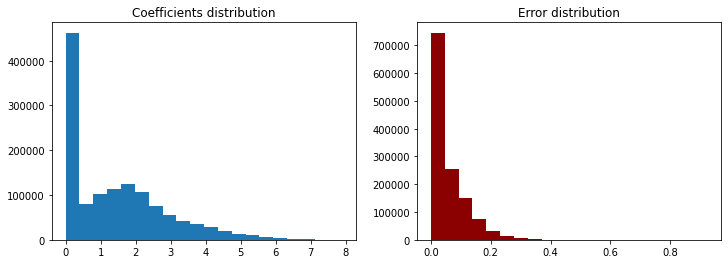

In [56]:
from matplotlib import pyplot as plt

# Is the noise managed by the encoder part?
difs = np.abs(encoded_imgs1-encoded_imgs2)
_ = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(encoded_imgs1.flatten(),20)
plt.title("Coefficients distribution")
plt.subplot(1,2,2)
plt.hist(difs.flatten(),20,color='darkred')
plt.title("Error distribution")
plt.show();